# Binning labels (start times, stop times, values)  - excluding or including pauses in movie playback

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/home/tamara/Documents/PhD/DeepHumanVision_deploy/")
from database.db_setup import *
import preprocessing.data_preprocessing.binning as binning
import annotation.stimulus_driven_annotation.movies.pause_handling as pause_handling
import preprocessing.data_preprocessing.create_vectors_from_time_points as create_vectors_from_time_points

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


Set parameters:

In [12]:
patient_id = 60
session_nr = 1
bin_size = 1000
annotator_id_cont_watch = "p1"
annotation_date_cont_watch = "2020-03-23"

# Binning of Labels (not spikes)

### (1) Get start and stop times of vector you would like to bin

In [5]:
values_cont_watch, start_times_cont_watch, stop_times_cont_watch = (ContinuousWatchSegments() & "patient_id={}".format(patient_id) & "session_nr={}".format(session_nr) & "annotator_id='{}'".format(annotator_id_cont_watch) & "label_entry_date='{}'".format(annotation_date_cont_watch)).fetch('values', 'start_times', 'stop_times')

### <font color='red'>(2) Decide whether you want to exclude pauses from the data</font>

In [6]:
exclude_pauses = False

### (3) Bin label

In [7]:
binned_label = binning.bin_label(patient_id, session_nr, values=values_cont_watch[0], start_times=start_times_cont_watch[0], stop_times=stop_times_cont_watch[0], bin_size=bin_size, exclude_pauses=exclude_pauses)

### (4) Plot binned vector

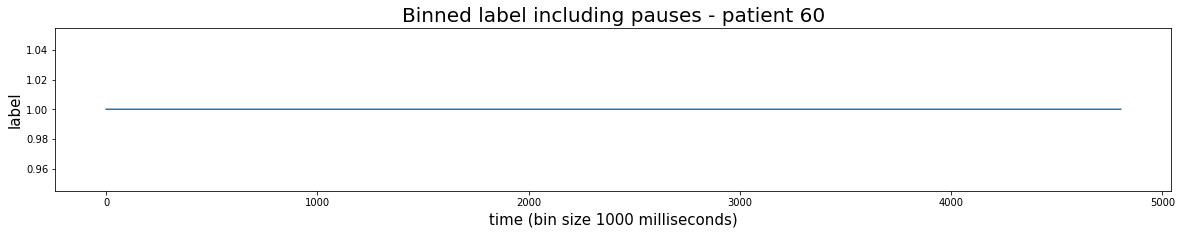

In [11]:
fig = plt.figure(figsize=(20,3))
plt.plot(binned_label)
if exclude_pauses:
    plt.title("Binned label excluding pauses - patient {}".format(patient_id), fontsize=20)
else:
    plt.title("Binned label including pauses - patient {}".format(patient_id), fontsize=20)

plt.xlabel("time (bin size {} milliseconds)".format(bin_size), fontsize=15)
plt.ylabel("label", fontsize=15)
plt.show()